## Techniques, Principles and Algorithms that go into building collaborative filters

### Similarity Measures
How can we mathematically quantify how different or similar two items are to each other

 1. Euclidean distance - the length of the line segment joining two data points plotted on an n-dimensional Cartesian plane **The lower the Euclidean score, the more similar the two points are to each other**

The Euclidean score is mathematically defined as:

$$
  d(\mathbf {v1,v2})= \sqrt{\sum \limits_{i=1}^n (q_i-r_i)^2}
$$

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# function to compute Euclidean distance
def euclidean(v1, v2):
    # convert 1-D Python lists to numpy vectors
    v1 = np.array(v1)
    v2 = np.array(v2)
    # compute vectors which is the element wise square of the distance
    diff = np.power(np.array(v1) - np.array(v2), 2)
    # perform summation of the elements of the above vector
    sigma_val = np.sum(diff)
    # compute square root amd return final euclidean score
    euclid_score =np.sqrt(sigma_val)
    return euclid_score

In [3]:
# define 3 users with rating for 5 movies
u1 = [5,1,2,4,5]
u2 = [1,5,4,2,1]
u3 = [5,2,2,4,4]

# from this, we see that 1 and 3 have fairly similar taste, while 2 and 1 have totally different tastes. Lets test5 our funtion 
euclidean(u1, u2)

7.483314773547883

In [4]:
euclidean(u1, u3)

1.4142135623730951

1 and 3 have a smaller euclidean score between them, compared to the score between 1 and 2. 
This proves that 1 and 3 have similar taste and the euclidean distance was able to capture the relationship between our users

 2. #### Pearson correlation

This is a score between -1 and 1, where -1 indicates total negative correlation and 1 indicates total positive correlation. 0 indicates that the two entities are in no way correlated with each other(independent of each other)

Take for example movie ratings from 2 users Bob and Alice
```
 Alice = [1,1,3,2,4]
 Bob = [2,2,4,3,5]
 ```
Their Eucledean distance would be ``` 2.2360679774997898 ```

But by just looking you can tell that Bob's rating is always higher by one compared to Alice's ratings. So it is safe to say that they are correlated.

Consider anothe user, Eve
```
eve = [5,5,3,4,2]
```
We see that eve has a totally different taste from Alice and their euclidean distance, ```6.324555320336759```

With Pearson correlation, we are able to make predictions on two very different people, as long as we have the rating of one, something euclidean distance can't

Pearson correlation can be expressed mathematically as follows:
$$
r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}
$$

In [5]:
# SciPy gives us access to a function that computes the pearson similarity scores
from scipy.stats import pearsonr
Alice = [1,1,3,2,4]
Bob = [2,2,4,3,5]

pearsonr(Alice, Bob)

PearsonRResult(statistic=1.0, pvalue=0.0)

In [6]:
eve = [5,5,3,4,2]
pearsonr(Alice, eve)

PearsonRResult(statistic=-1.0, pvalue=0.0)

3. #### Cosine Similarity
We used this extensively while building our [Content-based recommenders](https://github.com/CKawara/Recommendation-engines-with-Python/tree/main/Content-Based-Recommenders).

It computes the cosine of the angle between two vectors in an n-dimensional space. When the score is 1, the vesctors are exactly similar. -1 in the other hand, denotes that the two vectors are exactly dissimilar to each other

 - Different similarity scores are appropriet in different scenarios, in cases where magnitudeis important, the Euclidean distance is important. But in our case, correlation is more important to us, so we will be using Pearson and cosine similarity scores for our engines.

### Clustering


A type of unsupervised learning that groups data points into different classes in such a way that data points belong to a particular class are more similar to each other than data points belonging to different classes

#### k-means clustering
It takes in the data points and the number of clusters(k) as input, then it randomly plots k different points on the plane(centroids). it repeats assignment and reassignment of points to the centroids until there's no further change in the set of k centroids

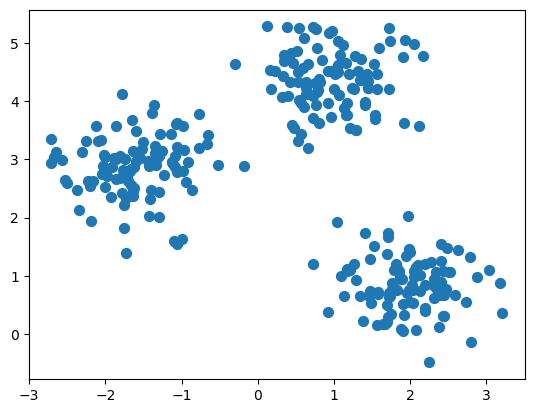

In [7]:
# Import the function that enables us to plot clusters
from sklearn.datasets._samples_generator import make_blobs

# get points such that they form 3 visually separable clusters
X,y = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=0)

# plot the points on a scatterplot
plt.scatter(X[:, 0], X[:, 1], s=50)

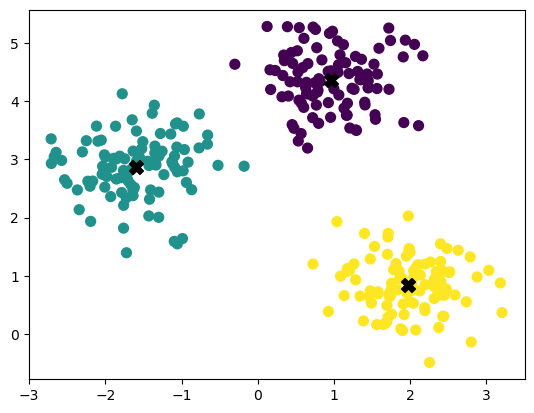

In [8]:
# import the k-means class
from sklearn.cluster import KMeans

# initialize k-means object
# set number of clusters to 3
# centroid initialization as 'random' and maximum iterations to 10

kmeans = KMeans(n_clusters=3, init='random', max_iter=10)

# compute the K-Means clustering
kmeans.fit(X)

# predict the classes for each point
y_pred =kmeans.predict(X)

# plot the data points again but with different colors for different classes
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

# get the list of the final centroids 
centroids = kmeans.cluster_centers_

# Plot the centroids onto the same scatterplot
plt.scatter(centroids[:, 0], centroids[:,1], c='black', s=100, marker='X')

#### Choosing K

We already know that choosing a good value of k is vital to the scuccess of our k-means algorithm. There are many methods available to determine a good value of K. We will discuss the **Elbow method** of determining k

The **Elbow Method** computes the sum of squares(the sum of the distance of each data point to the centroid of the cluster to which it was assigned) for each value of k and chooses the elbow point of the sum^of-squares v/s K plot as the best value for k.

It is defined as the value of k at which the sum-of-squares value for every subsequent k starts decreasing more slowly.

Now fortunately, Scikit-learn's implementation of k-means automatically computes the value of sum-of-squares when computing the clusters. 

c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<AxesSubplot:>

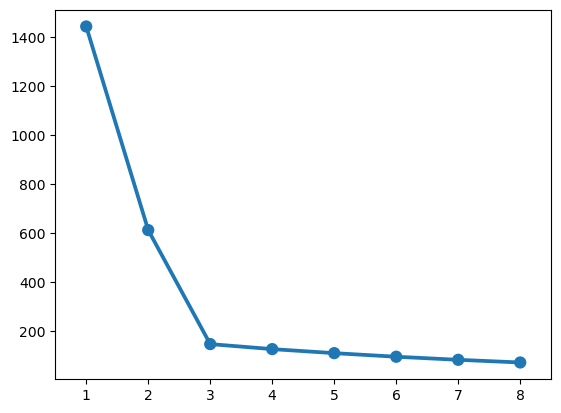

In [9]:
# visualizing the elbow plot for our data and det. the best value of k
# list to hold the sum of square values for different cluster sizes
ss=[]

# we will compute SS for cluster sizes between 1 and 8
for i in range(1,9):
    # initialize the kmeans object and call the fit method to compute clusters
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)
    # Append the value of SS for a particular iteration into the ss list
    ss.append(kmeans.inertia_)
    
# plot the elbow plot of SS v/s K
sns.pointplot(x=[j for j in range(1,9)], y=ss)


From the plot, our elbow is at K=3... which is the optimum number of clusters for this data.

### Exploring other clustering algorithms

Although very powerful, k-means is not always ideal. We will construct a plot with two half moons to demonstrate that

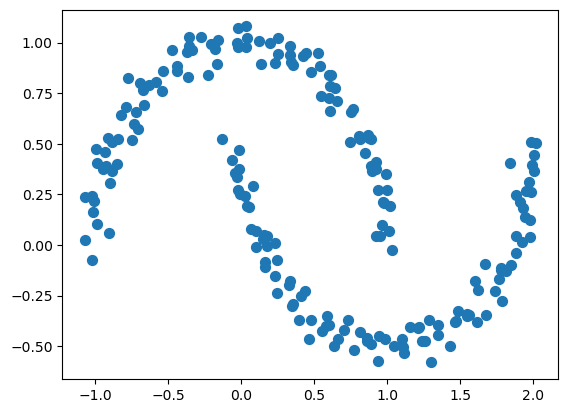

In [10]:
# import the half moon function from scikit-learn
from sklearn.datasets import make_moons

# get access to points using the make_moons function
X_m, Y_m = make_moons(200, noise=.05, random_state=0)

# plot the two half moon clusters
plt.scatter(X_m[:, 0], X_m[:, 1], s=50)

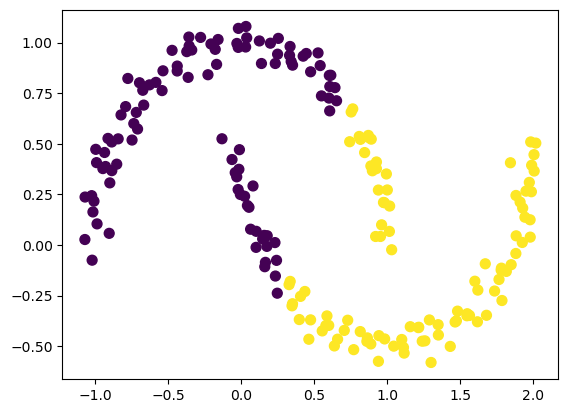

In [11]:
# Let's find out if k-means will be able to figure out the two half moons correctly
# initialize K-Means object with K=2 (for two half moons) and fit it to our data
kmm = KMeans(n_clusters=2, init='random', max_iter=10)
kmm.fit(X_m)

# predict the classes for the data points
y_m_pred = kmm.predict(X_m)

# plot the colored clusters as identified by K-Means
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_pred, s=50)

Clearly k-means does not do a very good job of identifying the correct clusters.

For such clusters such as half moons, spectral clustering with nearest-neighbor, affinity perfoms much much better

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


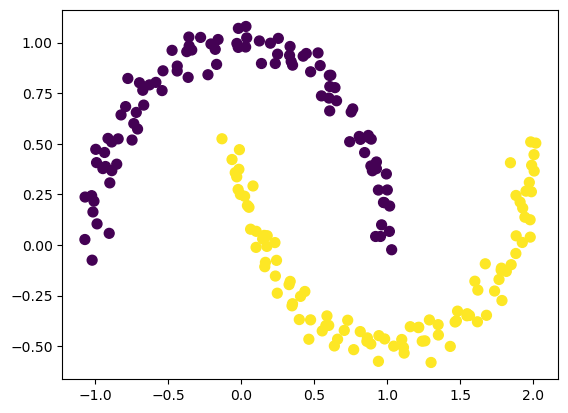

In [12]:
# Let's test out spectral clustering (using scikit-learn implementation of it)
# import Spectral clustering from scikit- learn
from sklearn.cluster import SpectralClustering

# define the spectral clustering model
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

# fit and predict the labels
y_m_sc = model.fit_predict(X_m)

# plot the colored clusters as identified by spectral clustering
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s=50)

### Dimensionality reduction

Most ML algorithms perfom poorly as the number of dimensions in data increases. Therefore it is always a good idea to reduce the number of features available in the data while retaining the max amount of information possible.

Two ways you could do this;

 - Feature Selection - Identifying the features with less predictiong power and dropping them.
 - Fearure Extraction - Takes in m-dimensional data and transforms it into an n-dimensional output space (usually where m >> n), while retaining most of the information.
 To understand this more, we will look at a feature extraction method called **Princial componentg analysis** (PCA)

#### PCA

This is an unsupervised feature extraction algo that takes in m-dimensional input to create a set of n (m >> n) linearly uncorrelated variables (called principal components) in such a way that the n dimensions lose as little variance (or information) as possible due to the loss of the (m-n) dimensions.

It is done in such a way that the first principal component holds the maximum variance (or information). It does so by considering those variables that are highly correlated to each other. Every principal component has more variance than every succeeding component.

To demo this, we will use an implementation of PCA that scikit-learn gives us and consider a usecase with the iris dataset

In [13]:
# Load the Iris dataset into Pandas DataFrame

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# display the head of the df
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Since the PCA algorithm is extremely sensitive to scale, we will scale all the features in such a way that they have a mean of 0 and a variance of 1

In [14]:
# Import standard scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# separate the features and the class
x = iris.drop('class', axis=1)
y = iris['class']

# scale the features of x
x = pd.DataFrame(StandardScaler().fit_transform(x), columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

x.head() 

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [15]:
# Now to transform our data into the two-dimensional space
# Import PCA
from sklearn.decomposition import PCA

# initialize a PCA object to transform into the 2D Space
pca = PCA(n_components=2)

# Apply PCA
pca_iris = pca.fit_transform(x)
pca_iris = pd.DataFrame(data = pca_iris, columns=['PC1', 'PC2'])

pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [16]:
# get information about the ratio of variance contained by each princial component
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

It is evident that the first principal component holds about 72.8% of the information, whereas the second principal component holds about 23.3% (in total, about 95.8% is retained). 4.2% was lost in removing two dimensions

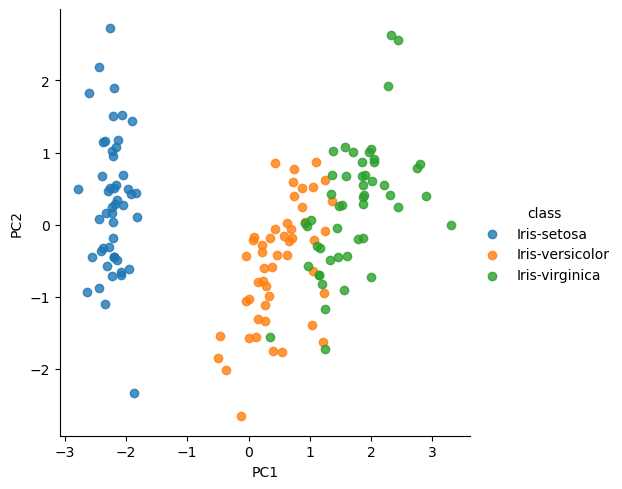

In [17]:
# on to visualizing our datapoints by class in the 2D plane
# Concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis = 1)

#Display the scatterplot
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False)

### Linear-discriminant analysis

This is another dimentionality reduction technique.

Similar to PCA, it aims to transform m-dimensional data into an n-dimensional output space. The difference is that, while PCA tries to retain the maximum information, LDA aims identify a set of n features that result in the maximum separation of classes. 

Since LDA requires a labeled data in order to determine its components, it is therefore a type of supervised learning.(hey! that's another difference)

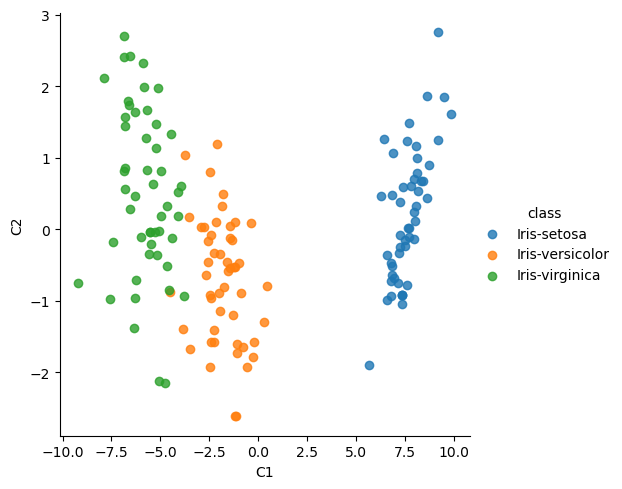

In [18]:
# applying LDA to Iris dataset
# import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# identify the LDA object to have two components
lda = LinearDiscriminantAnalysis(n_components=2)

# apply LDA
lda_iris = lda.fit_transform(x,y)
lda_iris = pd.DataFrame(data=lda_iris, columns=['C1','C2'])

# concatenate the class variable
lda_iris = pd.concat([lda_iris, y], axis=1)

# display the scatterplot
sns.lmplot(x='C1', y='C2', data=lda_iris, hue='class', fit_reg=False)

# T%he results show that the classes are much more separable than in PCA

#### Singular value decomposition

SVD is a matrix analysis technique that allows us to represent a high-dimentional matrix in a lower dimension. It does this by identifying and removing the less important parts of the matrix and producing an approximation in the desired number of dimensions.

### Supervised learning

A class of ML algorithm that takes in a series of vectors and their corresponding output as input, and produces an inferred function that can be used to map new examples. With supervised learning, it is import to have access to input which we already know the correct output.

It can be classified into two:
 - classification - a classification problem has a discrete set of values as the target variable(example, a like and a dislike)
 - regression - a regression problem has a continous value as its target(example, an average rating between one and five)

Let's look at some of the most porpular algorithms

#### k-nearest neighbors

k-NN, in the case of **classification**, assigns a class to a particular data point by a majority vote of its k nearest neighbors. The data point is assigned the class that is most common among its k-nearest neighbors.

In the case of **regression**, it computes the average value for the target variable on its k-nearest neighbors.

Unlike most ML algorithms, k-NN is non-parametric and lazy in nature
    - non-parametric - k-NN does not make any underlying assumptions about the distributionof the data. The model structure is determined by the data.
    - lazy - k-NN undergoes virtually no training. it only computes the k-nearest neighbors of a particular point in the prediction phase. This also means that k-NN needs to have access to the training data at all times and can't discard it during prediction.

#### Support vactor machines

It takes in an n-dimensional dataset as in put and constructs an (n-1)dimensional hyperplane in such a way that there is maximum separation of classes


#### Decision Trees

Extremely fast and simple tree-based algorithms that branch out on features that result in the largest information gain. Although not very accurate,they are extremely interpretable.

Decision trees have an element of randomness in their workings nad come up with different conditions in different iterations. The randomness and fast execution make them extremely popular in ensemble models(which we discuss below) 


#### Ensembling

The predictive power of multiple algorithms is much greater than a single algorithm. Decision trees are most common base algo used when building ensembling models

##### Bagging and random forests

Bagging(bootstrap aggregating) averages over a large number of base classificationmodels and averages their results to deliver its final prediction

Steps involving in building a bagging model:
    - A certain percentage of the data points are sampled. The sampling is done with replacement whic means a data point can appear in multiple iterations
    - A baseline classification model(decision tree typically) is trained on this sampled data.
    - The process id repeated until n number of models are trained. The final prediction delivered by the bagging model is the average of all predictions of all the base models

An improvement on the bagging model is the **random forest model**. In addition to sampling the datapoints, it also forces each baseline model to randomly select a subset of the features(usually a number equal to the square root of the total number of features)

#### Boosting
The bagging and random forest models train baseline models that are completely independent of eachother. Therefore, they don't learn from the mistakes that each learner has made, and this is where boosting comes into play.

Boosting models build a baseline model using a subset of samples and features. However, while building the next learners, the boosting model tries to rectify the mistakes that the previous learners made.